# Basics



In diesem Kapitel sollen die Basics vermittelt werden, die notwendig sind um in Deep Learning einsteigen zu können. Da DeepLearning stark auf Matrix Operationen aufbaut werden diese im ersten Abschnitt behandelt

## Matrix Operationen:
Hier zuerst die notwendigen Imports: 

In [4]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF
import plotly.graph_objs as go

import numpy as np
import pandas as pd
import scipy

### Matrix-Addition

Die erste einfache Operation ist die Matrix-Addition. Dabei wird jede Zelle der einen Matrix mit der dazugehörigen der anderen Matrix summiert. Wichtig dabei ist, dass beide Matrizen die gleichen Dimmensionen haben.

In [5]:
matrix1 = np.matrix(
    [[1, 4],
     [2, 0]]
)

matrix2 = np.matrix(
    [[-1, 2],
     [1, -2]]
)

matrix1 + matrix2

matrix([[ 0,  6],
        [ 3, -2]])

### Matrix-Multiplikation

Als nächstes folgt die Multiplikation 2er Matrizen. Dabei wird nach folgendem Schema vorgegangen:

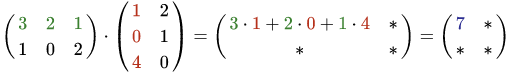

In [6]:
matrix1 * matrix2

matrix([[ 3, -6],
        [-2,  4]])

### Inverse Matrix

Für viele Operationen wird auch die Inverse Matrix benötigt. Dies geschieht indem für die folgende Gleichung nach der Lösung gesucht wird. Die Inverse Matrix ist dabei die 2te.
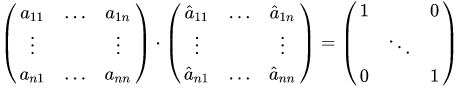

In [7]:
matrix = np.matrix(
    [[1, 4],
     [2, 0]]
)

inverse = np.linalg.inv(matrix)
inverse

matrix([[ 0.   ,  0.5  ],
        [ 0.25 , -0.125]])

### Transponieren

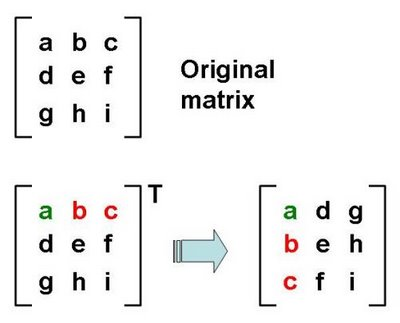

### Skalarprodukt

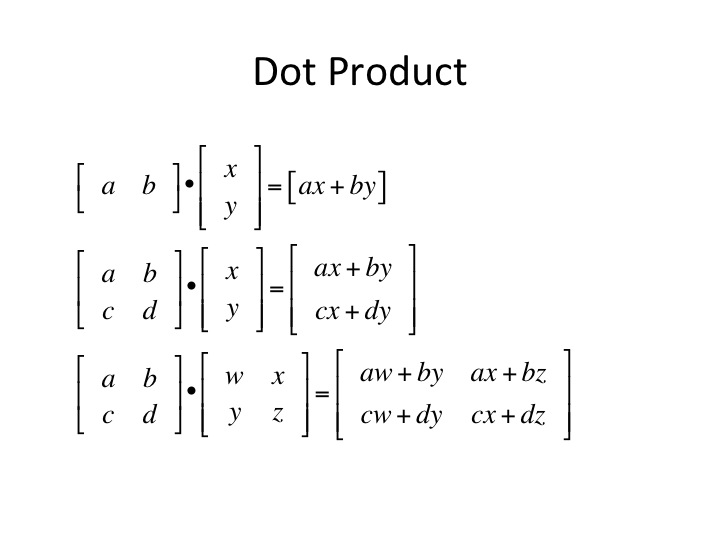

## Basics in Machine Learning

### Lineare Regression

based on: https://youtu.be/vOppzHpvTiQ

Dieses Beispiel lädt Daten aus einem Text-File zum Verhältnis Gehirn und Körpergewicht verschiedener Tierer. Der Algoritmus soll in der Lage sein, für ein beliebiges Gehirn-Gewicht das Körpergewicht zu berechnen. Verwendet wird dazu scikit-learn, welches Lineare Regeression anwendet

In [8]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [9]:
dataframe = pd.read_fwf('brain_body.txt')
x_values = dataframe[['Brain']]
y_values = dataframe[['Body']]

In [10]:
body_reg = linear_model.LinearRegression()
body_reg.fit(x_values, y_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

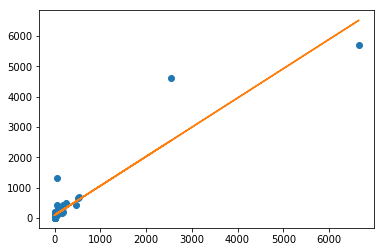

In [11]:
%matplotlib inline
plt.figure()
plt.plot(x_values, y_values, "o")
plt.plot(x_values, body_reg.predict(x_values))
plt.show()

## Sigmoid Function

Die Sigmoid-Funktion wird verwendet, um Gewichte neuronaler Netzte zu normalisieren. Sie sorgt dafür, dass die Änderung der Gewichte bei großen Fehler  größer sind und bei geringer Abweichung geringer werden.

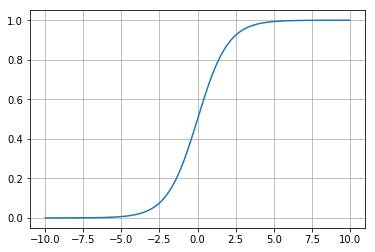

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.01)
y = 1 / (1 + np.exp(-x))

plt.figure()
plt.plot(x, y)
plt.grid(True)
plt.show()

### Neural Networks

based on: https://youtu.be/p69khggr1Jo

In diesem Beispiel soll ein Single-Layer Neural-Network erstellt werden. Dazu wird in diesem ersten Beispiel nur Numpy verwendet.

Dies ist ein 1-Layer Feedforward BP neuronales Netz:

In [13]:
from numpy import exp, array, random, dot

class NeuralNetwork():
    def __init__(self):
        random.seed(1)
        # initialize random weights in range -1 to 1
        self.synaptic_weights = 2 * random.random((3,1)) - 1
        
    def __sigmoid(self, x):
        """Defines the sigmoid function (s-shaped), to normalize the weights (0 to 1)"""
        return 1 / (1 + exp(-x))
        
    def __sigmoid_derivative(self, x):
        """gradient of the sigmoid curve"""
        return x * (1 - x)
    
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            output = self.predict(training_set_inputs)
            
            error = training_set_outputs - output
            
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
            
            self.synaptic_weights += adjustment
            
    def predict(self, inputs):
        return self.__sigmoid(dot(inputs, self.synaptic_weights))
        

Im folgenden wird unsere Klasse, die ein neuronales Netz darstellt verwendet um zuerst auf ein Trainings-Set zu trainieren und dann das trainierte "Wissen" zu testen.

In [14]:
neural_network = NeuralNetwork()

print('Random starting synaptic weights:')
print(neural_network.synaptic_weights)

training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

neural_network.train(training_set_inputs, training_set_outputs, 10000)

print('New synaptic weights after training: ')
print(neural_network.synaptic_weights)

print('Test the network with [1, 0, 0]')
print(neural_network.predict(array([1, 0, 0])))

Random starting synaptic weights:
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Test the network with [1, 0, 0]
[ 0.99993704]


## Mathe in DeepLearning

based on https://youtu.be/N4gDikiec8E

4 Schritte, die in DeepLearning angewendet werden:

1. Daten sammeln
1. Modell erstellen
1. Modell trainieren
1. Modell testen

### Schritt 1: Daten sammeln

1. Daten aufräumen
    - z.B. Daten entfernen, die unvollständig sind
2. Features entfernen, die nicht notwendig sind
3. Normalization
    - Daten skalieren auf [0, 1]

#### Min max scaling

Eine Technik, die verwendet wird um Daten zu normalisieren

In [15]:
data = np.array([20, 19, 10, 45, 54, 21, 25])

(data-min(data))/(max(data)-min(data))

array([ 0.22727273,  0.20454545,  0.        ,  0.79545455,  1.        ,
        0.25      ,  0.34090909])

#### Häufige Datentypen

1. Scalar
1. Vector
1. Matrix
1. Tensor

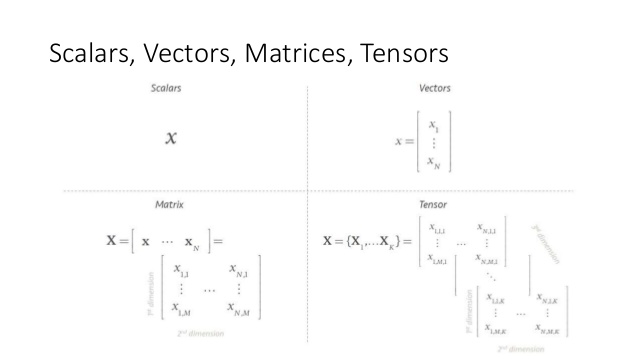

#### Hyperparameter

In DeepLearning werden Hyperparameter verwendet, um den Algorithmus zu konfiguriren. Unser 3-Layer neuronales Netz im nächsten Schritt hat nur einen Hyperparameter, die Anzahl der Lern-Epochen.

In [16]:
def nonlin(x, deriv=False):
    if deriv == True:
        return x * (1 - x)
    else:
        return 1 / (1 + np.exp(-x))

Erklärung zur nonlin-Funktion (non-linearity). deriv = True: berechnet die Steigung der Sigmoid-Funktion an der Stelle x. deriv = False: ist die Sigmoid Funktion => True ist die erste Ableitung der Sigmoid Funktion. 

In [17]:
x = np.array([[0, 0, 1],
             [0, 1, 1],
             [1, 0, 1],
             [1, 1, 1]])

y = np.array([[0], [1], [1], [0]])

num_epochs = 60000

# initilaize weights
syn0 = 2 * np.random.random((3, 4)) - 1
syn1 = 2 * np.random.random((4, 1)) - 1

print('syn0 davor:', syn0)
print('syn1 davor:', syn1)

for j in range(num_epochs):
    # Forward Step
    l_0 = x
    l_1 = nonlin(np.dot(l_0, syn0))
    l_2 = nonlin(np.dot(l_1, syn1))
    
    # Calculate Error Layer 2
    l_2_error = y - l_2
    
    if j % 10000 == 0 or j == 0:
        print(str(j), 'Error: ', str(np.mean(np.abs(l_2_error))))
    
    # Calculate Delta Layer 2
    l_2_delta = l_2_error * nonlin(l_2, deriv=True)
    
    # Calculate Error Layer 1
    l_1_error = l_2_delta.dot(syn1.T)
    
    # Calculate Delta Layer 1
    l_1_delta = l_1_error * nonlin(l_1, deriv=True)
    
    # Update weights
    syn1 += l_1.T.dot(l_2_delta)
    syn0 += l_0.T.dot(l_1_delta)

print('syn0 dannach:', syn0)
print('syn1 dannach:', syn1)

syn0 davor: [[-0.39533485 -0.70648822 -0.81532281 -0.62747958]
 [-0.30887855 -0.20646505  0.07763347 -0.16161097]
 [ 0.370439   -0.5910955   0.75623487 -0.94522481]]
syn1 davor: [[ 0.34093502]
 [-0.1653904 ]
 [ 0.11737966]
 [-0.71922612]]
0 Error:  0.499448333066
10000 Error:  0.010994048083
20000 Error:  0.00741992342612
30000 Error:  0.00593610684607
40000 Error:  0.00507775923789
50000 Error:  0.0045027134284
syn0 dannach: [[-4.98115754 -0.3810413  -4.06374792 -7.11738536]
 [-4.5336703   1.55698202 -3.49772313 -7.33741023]
 [ 7.05113831  1.93565003  5.56488158  3.14503547]]
syn1 dannach: [[  8.14031689]
 [ -6.92417658]
 [  5.44319261]
 [-13.59529433]]
